<font size="5">Importing materials needed</font>

Importing potential libraries to be used

In [1]:
import requests
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Importing data using RedCap API Token information and writing it to a csv file

In [12]:
from ASLSurveyKey import APIKEY

In [67]:
data = {
    'token': APIKEY,
    'content': 'record',
    'action': 'export',
    'format': 'csv',
    'type': 'flat',
    'csvDelimiter': '',
    'records[0]': '24',
    'records[1]': '39',
    'records[2]': '27',
    'records[3]': '35',
    'records[4]': '38',
    'records[5]': '34',
    'records[6]': '41',
    'records[9]': '37',
    'records[10]': '29',
    'records[11]': '44',
    'records[12]': '45',
    'records[13]': '46',
    'records[14]': '48',
    'records[15]': '49',
    'records[16]': '55',
    'records[17]': '51',
    'records[18]': '53',
    'records[19]': '54',
    'records[20]': '58',
    'records[21]': '25',
    'records[22]': '36',
    'records[23]': '70',
    'records[24]': '75',
    'records[25]': '77',
    'records[26]': '82',
    'records[27]': '88',
    'records[28]': '74',
    'records[29]': '85',
    'records[30]': '79',
    'records[31]': '68',
    'records[32]': '72',
    'records[33]': '91',
    'records[34]': '94',
    'records[35]': '103',
    'records[36]': '104',
    'rawOrLabel': 'label',
    'rawOrLabelHeaders': 'label',
    'exportCheckboxLabel': 'false',
    'exportSurveyFields': 'false',
    'exportDataAccessGroups': 'false',
    'returnFormat': 'csv'
}
response = requests.post('https://redcap.iths.org/api/', data=data)

# Here I am checking if everything is working as it should
if response.status_code == 200:
    filename = 'ASLSurveyInformation.csv'
    lines = response.text.splitlines()
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(csv.reader(lines))
#This tells me what the file name is so I don't have to go back through this code to remember what I saved it as
    print('Data written to', filename)
#This will tell me why I can't do what I want to do
else:
    print('HTTP Status:', response.status_code)
    print('Error:', response.text)

Data written to ASLSurveyInformation.csv


Reading the CSV into a dataframe

In [68]:
ASLSurveyInformation = pd.read_csv('ASLSurveyInformation.csv')

<font size="5">Organizing groups</font>


Identifying which RedCap survey ID goes into which group

In [69]:
categories = {
    'CODA': [24, 39, 27, 35, 38, 34, 41, 37],
    'nonSigningHearing': [29, 44, 45, 46, 48, 49, 55, 51, 53, 54, 58],
    'interpreters': [25, 36, 70],
    'ASLStudents': [75, 77, 82, 88, 74, 85, 79, 68, 72],
    'Deaf': [91, 94, 103, 104]}

Identifying which cleaned file is associated with which Redcap survey ID

In [70]:
participant_and_file = {'C02_cleaned.csv': 39, 
                        'C05_cleaned.csv': 27, 
                        'C08_cleaned.csv': 35, 
                        'C09_cleaned.csv': 38, 
                        'C10_cleaned.csv': 34, 
                        'C11_cleaned.csv': 41, 
                        'C17_cleaned.csv': 37, 
                        'H02_cleaned.csv': 29, 
                        'H03_cleaned.csv': 44, 
                        'H05_cleaned.csv': 45, 
                        'H07_cleaned.csv': 46, 
                        'H08_cleaned.csv': 48, 
                        'H09_cleaned.csv': 49, 
                        'H12_cleaned.csv': 55, 
                        'H13_cleaned.csv': 51, 
                        'H14_cleaned.csv': 53, 
                        'H15_cleaned.csv': 59, 
                        'H18_cleaned.csv': 58, 
                        'T04_cleaned.csv': 25, 
                        'T05_cleaned.csv': 36, 
                        'T08_cleaned.csv': 70, 
                        'S04_cleaned.csv': 75, 
                        'S03_cleaned.csv': 77, 
                        'S07_cleaned.csv': 82, 
                        'S09_cleaned.csv': 88, 
                        'S05_cleaned.csv': 74, 
                        'S08_cleaned.csv': 85, 
                        'S06_cleaned.csv': 79, 
                        'S02_cleaned.csv': 60, 
                        'S11_cleaned.csv': 72, 
                        'D02_cleaned.csv': 91, 
                        'D03_cleaned.csv': 94, 
                        'D05_cleaned.csv': 103, 
                        'D06_cleaned.csv': 104}


In [114]:
participant_and_file

{'C02_cleaned.csv': 39,
 'C05_cleaned.csv': 27,
 'C08_cleaned.csv': 35,
 'C09_cleaned.csv': 38,
 'C10_cleaned.csv': 34,
 'C11_cleaned.csv': 41,
 'C17_cleaned.csv': 37,
 'H02_cleaned.csv': 29,
 'H03_cleaned.csv': 44,
 'H05_cleaned.csv': 45,
 'H07_cleaned.csv': 46,
 'H08_cleaned.csv': 48,
 'H09_cleaned.csv': 49,
 'H12_cleaned.csv': 55,
 'H13_cleaned.csv': 51,
 'H14_cleaned.csv': 53,
 'H15_cleaned.csv': 59,
 'H18_cleaned.csv': 58,
 'T04_cleaned.csv': 25,
 'T05_cleaned.csv': 36,
 'T08_cleaned.csv': 70,
 'S04_cleaned.csv': 75,
 'S03_cleaned.csv': 77,
 'S07_cleaned.csv': 82,
 'S09_cleaned.csv': 88,
 'S05_cleaned.csv': 74,
 'S08_cleaned.csv': 85,
 'S06_cleaned.csv': 79,
 'S02_cleaned.csv': 60,
 'S11_cleaned.csv': 72,
 'D02_cleaned.csv': 91,
 'D03_cleaned.csv': 94,
 'D05_cleaned.csv': 103,
 'D06_cleaned.csv': 104}

<font size="5">Match Scores</font>

Making a dictionary telling me the match score from each file

In [71]:
participant_Matchscores = {}

for file, participant_id in participant_and_file.items():
    file_path = 'C:/Users/Jasmine Awad/Desktop/COMS Data Science/RawDataASLTB/CleanedData/' + file  # Update the path to the directory containing participant files
    task_data = pd.read_csv(file_path)
    score = task_data['MatchScore'].iloc[0]  # Replace 'MatchScore' with the actual column name containing the score
    
    participant_Matchscores[file] = score


In [72]:
participant_Matchscores

{'C02_cleaned.csv': 20.0,
 'C05_cleaned.csv': 18.0,
 'C08_cleaned.csv': 11.0,
 'C09_cleaned.csv': 19.0,
 'C10_cleaned.csv': 20.0,
 'C11_cleaned.csv': 20.0,
 'C17_cleaned.csv': 18.0,
 'H02_cleaned.csv': 11.0,
 'H03_cleaned.csv': 13.0,
 'H05_cleaned.csv': 10.0,
 'H07_cleaned.csv': 13.0,
 'H08_cleaned.csv': 10.0,
 'H09_cleaned.csv': 7.0,
 'H12_cleaned.csv': 10.0,
 'H13_cleaned.csv': 11.0,
 'H14_cleaned.csv': 18.0,
 'H15_cleaned.csv': 5.0,
 'H18_cleaned.csv': 11.0,
 'T04_cleaned.csv': 20.0,
 'T05_cleaned.csv': 20.0,
 'T08_cleaned.csv': 15.0,
 'S04_cleaned.csv': 14.0,
 'S03_cleaned.csv': 20.0,
 'S07_cleaned.csv': 15.0,
 'S09_cleaned.csv': 19.0,
 'S05_cleaned.csv': 20.0,
 'S08_cleaned.csv': 10.0,
 'S06_cleaned.csv': 16.0,
 'S02_cleaned.csv': 13.0,
 'S11_cleaned.csv': 20.0,
 'D02_cleaned.csv': 19.0,
 'D03_cleaned.csv': 20.0,
 'D05_cleaned.csv': 20.0,
 'D06_cleaned.csv': 11.0}

Creating a dictionary for each of my participants in the dictionary. Adding participant ID as an additional value for each file for easier analysis. 

In [73]:
updated_participant_Matchscores = {}

for file, participant_id in participant_and_file.items():
    if file in participant_Matchscores:
        score = participant_Matchscores[file]
        updated_participant_Matchscores[file] = {'score': score, 'participant_id': participant_id}


In [74]:
updated_participant_Matchscores

{'C02_cleaned.csv': {'score': 20.0, 'participant_id': 39},
 'C05_cleaned.csv': {'score': 18.0, 'participant_id': 27},
 'C08_cleaned.csv': {'score': 11.0, 'participant_id': 35},
 'C09_cleaned.csv': {'score': 19.0, 'participant_id': 38},
 'C10_cleaned.csv': {'score': 20.0, 'participant_id': 34},
 'C11_cleaned.csv': {'score': 20.0, 'participant_id': 41},
 'C17_cleaned.csv': {'score': 18.0, 'participant_id': 37},
 'H02_cleaned.csv': {'score': 11.0, 'participant_id': 29},
 'H03_cleaned.csv': {'score': 13.0, 'participant_id': 44},
 'H05_cleaned.csv': {'score': 10.0, 'participant_id': 45},
 'H07_cleaned.csv': {'score': 13.0, 'participant_id': 46},
 'H08_cleaned.csv': {'score': 10.0, 'participant_id': 48},
 'H09_cleaned.csv': {'score': 7.0, 'participant_id': 49},
 'H12_cleaned.csv': {'score': 10.0, 'participant_id': 55},
 'H13_cleaned.csv': {'score': 11.0, 'participant_id': 51},
 'H14_cleaned.csv': {'score': 18.0, 'participant_id': 53},
 'H15_cleaned.csv': {'score': 5.0, 'participant_id': 59},

Creating a scatterplot looking at Match score on ASLTB and participant's reported ASL Fluency on RedCap. This separates participant groups using color.

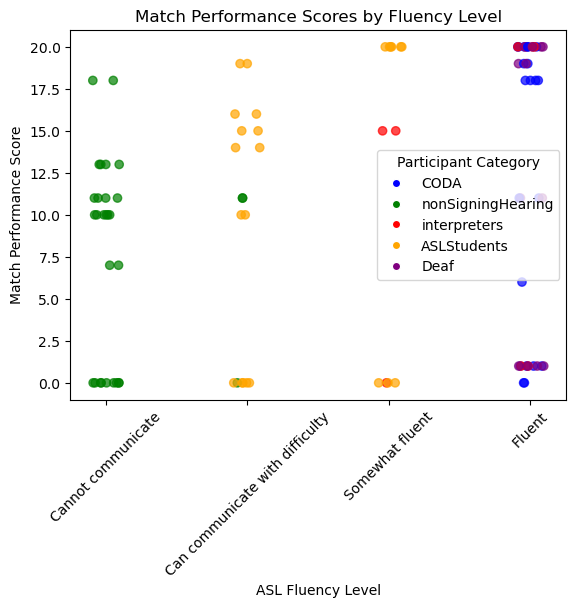

In [189]:
# Define the amount of jitter
jitter = 0.1

# Create a dictionary to store the participant data
participant_data = {}

# Iterate over the participant data
for file, data in updated_participant_Matchscores.items():
    if data['participant_id'] in grouped_participant_ids:
        participant_id = data['participant_id']
        # Check if the participant ID already exists in the dictionary
        if participant_id in participant_data:
            # Skip if the participant ID already has data
            continue

        scores.append(data['score'])
        participant_ids.append(participant_id)
        fluency_level = ASLSurveyInformation.loc[ASLSurveyInformation['Record ID'] == participant_id, 'How fluent are you in ASL?'].iloc[0]
        fluency_levels.append(fluency_level)

        # Add the participant data to the dictionary
        participant_data[participant_id] = {
            'score': data['score'],
            'fluency_level': fluency_level
        }

# Convert fluency_levels to the corresponding indices in the desired order
fluency_indices = [fluency_level_mapping[fl] for fl in fluency_levels]

# Color coding for each participant based on their group
colors = [color_map[grouped_participant_ids[id]] for id in participant_ids]

# Add jitter to the x-axis values
jittered_fluency_indices = [val + np.random.uniform(-jitter, jitter) for val in fluency_indices]

# Create the scatterplot with jitter
plt.scatter(jittered_fluency_indices, scores, c=colors, alpha=0.7)

# Rest of the code remains the same
plt.xlabel('ASL Fluency Level')
plt.ylabel('Match Performance Score')
plt.title('Match Performance Scores by Fluency Level')
plt.xticks(range(len(x_axis_labels)), x_axis_labels, rotation=45)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


<font size="5">Maze Scores</font>

Making a dictionary telling me the maze score from each file

In [192]:
participant_Mazescores = {}

for file, participant_id in participant_and_file.items():
    file_path = 'C:/Users/Jasmine Awad/Desktop/COMS Data Science/RawDataASLTB/CleanedData/' + file  # Update the path to the directory containing participant files
    task_data = pd.read_csv(file_path)
    score = task_data['MazeScore'].iloc[0]  # Replace 'MatchScore' with the actual column name containing the score
    
    participant_Mazescores[file] = score

In [193]:
participant_Mazescores

{'C02_cleaned.csv': 4.0,
 'C05_cleaned.csv': 6.0,
 'C08_cleaned.csv': 6.0,
 'C09_cleaned.csv': 6.0,
 'C10_cleaned.csv': 3.0,
 'C11_cleaned.csv': 6.0,
 'C17_cleaned.csv': 4.0,
 'H02_cleaned.csv': 2.0,
 'H03_cleaned.csv': 1.0,
 'H05_cleaned.csv': 4.0,
 'H07_cleaned.csv': 1.0,
 'H08_cleaned.csv': 2.0,
 'H09_cleaned.csv': 4.0,
 'H12_cleaned.csv': 3.0,
 'H13_cleaned.csv': 2.0,
 'H14_cleaned.csv': 0.0,
 'H15_cleaned.csv': 0.0,
 'H18_cleaned.csv': 3.0,
 'T04_cleaned.csv': 6.0,
 'T05_cleaned.csv': 4.0,
 'T08_cleaned.csv': 4.0,
 'S04_cleaned.csv': 4.0,
 'S03_cleaned.csv': 4.0,
 'S07_cleaned.csv': 0.0,
 'S09_cleaned.csv': 2.0,
 'S05_cleaned.csv': 2.0,
 'S08_cleaned.csv': 2.0,
 'S06_cleaned.csv': 4.0,
 'S02_cleaned.csv': 3.0,
 'S11_cleaned.csv': 1.0,
 'D02_cleaned.csv': 6.0,
 'D03_cleaned.csv': 6.0,
 'D05_cleaned.csv': 4.0,
 'D06_cleaned.csv': 2.0}

Creating a dictionary for each of my participants in the dictionary. Adding participant ID as an additional value for each file for easier analysis. 

In [194]:
updated_participant_Mazescores = {}

for file, participant_id in participant_and_file.items():
    if file in participant_Mazescores:
        score = participant_Mazescores[file]
        updated_participant_Mazescores[file] = {'score': score, 'participant_id': participant_id}


In [195]:
updated_participant_Mazescores

{'C02_cleaned.csv': {'score': 4.0, 'participant_id': 39},
 'C05_cleaned.csv': {'score': 6.0, 'participant_id': 27},
 'C08_cleaned.csv': {'score': 6.0, 'participant_id': 35},
 'C09_cleaned.csv': {'score': 6.0, 'participant_id': 38},
 'C10_cleaned.csv': {'score': 3.0, 'participant_id': 34},
 'C11_cleaned.csv': {'score': 6.0, 'participant_id': 41},
 'C17_cleaned.csv': {'score': 4.0, 'participant_id': 37},
 'H02_cleaned.csv': {'score': 2.0, 'participant_id': 29},
 'H03_cleaned.csv': {'score': 1.0, 'participant_id': 44},
 'H05_cleaned.csv': {'score': 4.0, 'participant_id': 45},
 'H07_cleaned.csv': {'score': 1.0, 'participant_id': 46},
 'H08_cleaned.csv': {'score': 2.0, 'participant_id': 48},
 'H09_cleaned.csv': {'score': 4.0, 'participant_id': 49},
 'H12_cleaned.csv': {'score': 3.0, 'participant_id': 55},
 'H13_cleaned.csv': {'score': 2.0, 'participant_id': 51},
 'H14_cleaned.csv': {'score': 0.0, 'participant_id': 53},
 'H15_cleaned.csv': {'score': 0.0, 'participant_id': 59},
 'H18_cleaned.

Creating a scatterplot looking at Maze score on ASLTB and participant's reported ASL Fluency on RedCap. This separates participant groups using color.

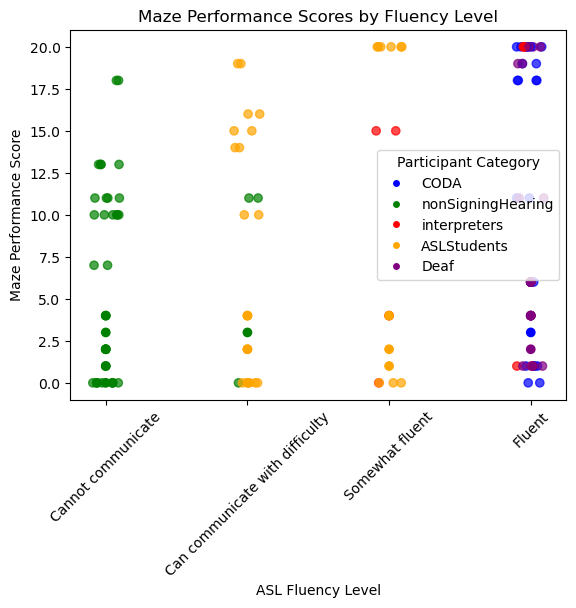

In [196]:
# Define the amount of jitter
jitter = 0.1

# Add jitter to the x-axis values
jittered_fluency_indices = [val + np.random.uniform(-jitter, jitter) for val in fluency_indices]

# Create the scatterplot with jitter
plt.scatter(jittered_fluency_indices, scores, c=colors, alpha=0.7)

# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define the desired order of x-axis labels
x_axis_labels = ['Cannot communicate', 'Can communicate with difficulty', 'Somewhat fluent', 'Fluent']

# Create a mapping dictionary for fluency levels and their indices in the desired order
fluency_level_mapping = {
    'Cannot communicate': 0,
    'Can communicate with difficulty': 1,
    'Somewhat fluent': 2,
    'Fluent': 3
}

# Extract scores, participant IDs, and fluency levels from the updated_participant_Matchscores dictionary
scores = []
participant_ids = []
fluency_levels = []

for file, data in updated_participant_Mazescores.items():
    if data['participant_id'] in grouped_participant_ids:
        scores.append(data['score'])
        participant_ids.append(data['participant_id'])
        # Get the fluency level for the current participant ID from ASLSurveyInformation
        fluency_level = ASLSurveyInformation.loc[ASLSurveyInformation['Record ID'] == data['participant_id'], 'How fluent are you in ASL?'].iloc[0]
        fluency_levels.append(fluency_level)

# Convert fluency_levels to the corresponding indices in the desired order
fluency_indices = [fluency_level_mapping[fl] for fl in fluency_levels]

# Color coding for each participant based on their group
colors = [color_map[grouped_participant_ids[id]] for id in participant_ids]

# Create the scatterplot
plt.scatter(fluency_indices, scores, c=colors)
plt.xlabel('ASL Fluency Level')
plt.ylabel('Maze Performance Score')
plt.title('Maze Performance Scores by Fluency Level')


# Set the x-axis tick labels in the desired order
plt.xticks(range(len(x_axis_labels)), x_axis_labels, rotation=45)
# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


<font size="5">Finger Spelling Scores</font>

Making a dictionary telling me the fingerspelling score from each file

In [81]:
participant_FSscores = {}

for file, participant_id in participant_and_file.items():
    file_path = 'C:/Users/Jasmine Awad/Desktop/COMS Data Science/RawDataASLTB/CleanedData/' + file  # Update the path to the directory containing participant files
    task_data = pd.read_csv(file_path)
    score = task_data['FSScore'].iloc[0]  # Replace 'MatchScore' with the actual column name containing the score
    
    participant_FSscores[file] = score

In [82]:
participant_FSscores

{'C02_cleaned.csv': 10.0,
 'C05_cleaned.csv': 9.0,
 'C08_cleaned.csv': 10.0,
 'C09_cleaned.csv': 10.0,
 'C10_cleaned.csv': 9.0,
 'C11_cleaned.csv': 10.0,
 'C17_cleaned.csv': 10.0,
 'H02_cleaned.csv': 0.0,
 'H03_cleaned.csv': 0.0,
 'H05_cleaned.csv': 0.0,
 'H07_cleaned.csv': 0.0,
 'H08_cleaned.csv': 0.0,
 'H09_cleaned.csv': 0.0,
 'H12_cleaned.csv': 0.0,
 'H13_cleaned.csv': 0.0,
 'H14_cleaned.csv': 1.0,
 'H15_cleaned.csv': 0.0,
 'H18_cleaned.csv': 0.0,
 'T04_cleaned.csv': 10.0,
 'T05_cleaned.csv': 10.0,
 'T08_cleaned.csv': 6.0,
 'S04_cleaned.csv': 1.0,
 'S03_cleaned.csv': 6.0,
 'S07_cleaned.csv': 2.0,
 'S09_cleaned.csv': 4.0,
 'S05_cleaned.csv': 3.0,
 'S08_cleaned.csv': 1.0,
 'S06_cleaned.csv': 2.0,
 'S02_cleaned.csv': 2.0,
 'S11_cleaned.csv': 6.0,
 'D02_cleaned.csv': 10.0,
 'D03_cleaned.csv': 10.0,
 'D05_cleaned.csv': 9.0,
 'D06_cleaned.csv': 5.0}

Creating a dictionary for each of my participants in the dictionary. Adding participant ID as an additional value for each file for easier analysis. 

In [83]:
updated_participant_FSscores = {}

for file, participant_id in participant_and_file.items():
    if file in participant_FSscores:
        score = participant_FSscores[file]
        updated_participant_FSscores[file] = {'score': score, 'participant_id': participant_id}


In [84]:
updated_participant_FSscores

{'C02_cleaned.csv': {'score': 10.0, 'participant_id': 39},
 'C05_cleaned.csv': {'score': 9.0, 'participant_id': 27},
 'C08_cleaned.csv': {'score': 10.0, 'participant_id': 35},
 'C09_cleaned.csv': {'score': 10.0, 'participant_id': 38},
 'C10_cleaned.csv': {'score': 9.0, 'participant_id': 34},
 'C11_cleaned.csv': {'score': 10.0, 'participant_id': 41},
 'C17_cleaned.csv': {'score': 10.0, 'participant_id': 37},
 'H02_cleaned.csv': {'score': 0.0, 'participant_id': 29},
 'H03_cleaned.csv': {'score': 0.0, 'participant_id': 44},
 'H05_cleaned.csv': {'score': 0.0, 'participant_id': 45},
 'H07_cleaned.csv': {'score': 0.0, 'participant_id': 46},
 'H08_cleaned.csv': {'score': 0.0, 'participant_id': 48},
 'H09_cleaned.csv': {'score': 0.0, 'participant_id': 49},
 'H12_cleaned.csv': {'score': 0.0, 'participant_id': 55},
 'H13_cleaned.csv': {'score': 0.0, 'participant_id': 51},
 'H14_cleaned.csv': {'score': 1.0, 'participant_id': 53},
 'H15_cleaned.csv': {'score': 0.0, 'participant_id': 59},
 'H18_cle

Creating a scatterplot looking at Fingerspelling score on ASLTB and participant's reported ASL Fluency on RedCap. This separates participant groups using color.

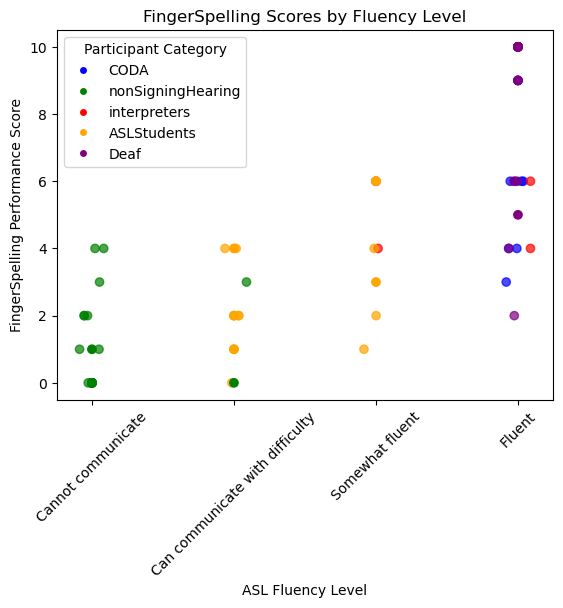

In [85]:
# Define the amount of jitter
jitter = 0.1

# Add jitter to the x-axis values
jittered_fluency_indices = [val + np.random.uniform(-jitter, jitter) for val in fluency_indices]

# Create the scatterplot with jitter
plt.scatter(jittered_fluency_indices, scores, c=colors, alpha=0.7)

# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define the desired order of x-axis labels
x_axis_labels = ['Cannot communicate', 'Can communicate with difficulty', 'Somewhat fluent', 'Fluent']

# Create a mapping dictionary for fluency levels and their indices in the desired order
fluency_level_mapping = {
    'Cannot communicate': 0,
    'Can communicate with difficulty': 1,
    'Somewhat fluent': 2,
    'Fluent': 3
}

# Extract scores, participant IDs, and fluency levels from the updated_participant_Matchscores dictionary
scores = []
participant_ids = []
fluency_levels = []

for file, data in updated_participant_FSscores.items():
    if data['participant_id'] in grouped_participant_ids:
        scores.append(data['score'])
        participant_ids.append(data['participant_id'])
        # Get the fluency level for the current participant ID from ASLSurveyInformation
        fluency_level = ASLSurveyInformation.loc[ASLSurveyInformation['Record ID'] == data['participant_id'], 'How fluent are you in ASL?'].iloc[0]
        fluency_levels.append(fluency_level)

# Convert fluency_levels to the corresponding indices in the desired order
fluency_indices = [fluency_level_mapping[fl] for fl in fluency_levels]

# Color coding for each participant based on their group
colors = [color_map[grouped_participant_ids[id]] for id in participant_ids]

# Create the scatterplot
plt.scatter(fluency_indices, scores, c=colors)
plt.xlabel('ASL Fluency Level')
plt.ylabel('FingerSpelling Performance Score')
plt.title('FingerSpelling Scores by Fluency Level')


# Set the x-axis tick labels in the desired order
plt.xticks(range(len(x_axis_labels)), x_axis_labels, rotation=45)
# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


<font size="5">Story Task Scores</font>

Making a dictionary telling me the story task score from each file

In [181]:
participant_STscores = {}

for file, participant_id in participant_and_file.items():
    file_path = 'C:/Users/Jasmine Awad/Desktop/COMS Data Science/RawDataASLTB/CleanedData/' + file  # Update the path to the directory containing participant files
    task_data = pd.read_csv(file_path)
    score = task_data['STScore'].iloc[0]  # Replace 'MatchScore' with the actual column name containing the score
    
    participant_STscores[file] = score

In [182]:
participant_STscores

{'C02_cleaned.csv': 6.0,
 'C05_cleaned.csv': 0.0,
 'C08_cleaned.csv': 1.0,
 'C09_cleaned.csv': 1.0,
 'C10_cleaned.csv': 1.0,
 'C11_cleaned.csv': 0.0,
 'C17_cleaned.csv': 1.0,
 'H02_cleaned.csv': 0.0,
 'H03_cleaned.csv': 0.0,
 'H05_cleaned.csv': 0.0,
 'H07_cleaned.csv': 0.0,
 'H08_cleaned.csv': 0.0,
 'H09_cleaned.csv': 0.0,
 'H12_cleaned.csv': 0.0,
 'H13_cleaned.csv': 0.0,
 'H14_cleaned.csv': 0.0,
 'H15_cleaned.csv': 0.0,
 'H18_cleaned.csv': 0.0,
 'T04_cleaned.csv': 1.0,
 'T05_cleaned.csv': 1.0,
 'T08_cleaned.csv': 0.0,
 'S04_cleaned.csv': 0.0,
 'S03_cleaned.csv': 0.0,
 'S07_cleaned.csv': 0.0,
 'S09_cleaned.csv': 0.0,
 'S05_cleaned.csv': 0.0,
 'S08_cleaned.csv': 0.0,
 'S06_cleaned.csv': 0.0,
 'S02_cleaned.csv': 0.0,
 'S11_cleaned.csv': 0.0,
 'D02_cleaned.csv': 1.0,
 'D03_cleaned.csv': 1.0,
 'D05_cleaned.csv': 1.0,
 'D06_cleaned.csv': 1.0}

Creating a dictionary for each of my participants in the dictionary. Adding participant ID as an additional value for each file for easier analysis. 

In [88]:
updated_participant_STscores = {}

for file, participant_id in participant_and_file.items():
    if file in participant_STscores:
        score = participant_STscores[file]
        updated_participant_STscores[file] = {'score': score, 'participant_id': participant_id}


In [183]:
updated_participant_STscores

{'C02_cleaned.csv': {'score': 6.0, 'participant_id': 39},
 'C05_cleaned.csv': {'score': 0.0, 'participant_id': 27},
 'C08_cleaned.csv': {'score': 1.0, 'participant_id': 35},
 'C09_cleaned.csv': {'score': 1.0, 'participant_id': 38},
 'C10_cleaned.csv': {'score': 1.0, 'participant_id': 34},
 'C11_cleaned.csv': {'score': 0.0, 'participant_id': 41},
 'C17_cleaned.csv': {'score': 1.0, 'participant_id': 37},
 'H02_cleaned.csv': {'score': 0.0, 'participant_id': 29},
 'H03_cleaned.csv': {'score': 0.0, 'participant_id': 44},
 'H05_cleaned.csv': {'score': 0.0, 'participant_id': 45},
 'H07_cleaned.csv': {'score': 0.0, 'participant_id': 46},
 'H08_cleaned.csv': {'score': 0.0, 'participant_id': 48},
 'H09_cleaned.csv': {'score': 0.0, 'participant_id': 49},
 'H12_cleaned.csv': {'score': 0.0, 'participant_id': 55},
 'H13_cleaned.csv': {'score': 0.0, 'participant_id': 51},
 'H14_cleaned.csv': {'score': 0.0, 'participant_id': 53},
 'H15_cleaned.csv': {'score': 0.0, 'participant_id': 59},
 'H18_cleaned.

Creating a scatterplot looking at Story score on ASLTB and participant's reported ASL Fluency on RedCap. This separates participant groups using color.

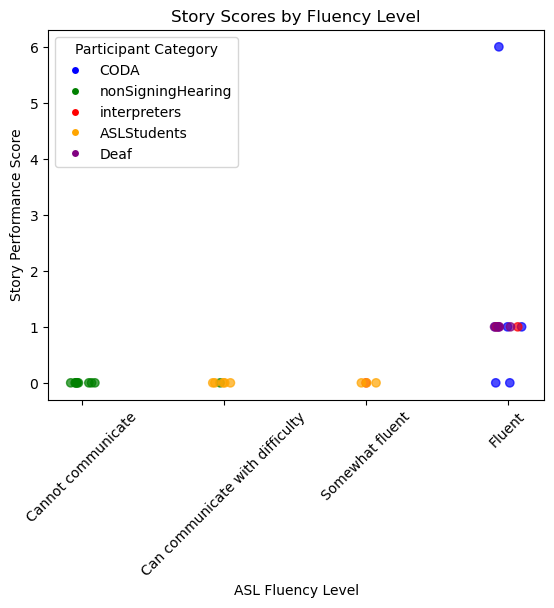

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Define the amount of jitter
jitter = 0.1

# Create empty lists to store the scores, participant IDs, and fluency levels
scores = []
participant_ids = []
fluency_levels = []

for file, data in updated_participant_STscores.items():
    if data['participant_id'] in grouped_participant_ids:
        scores.append(data['score'])
        participant_ids.append(data['participant_id'])
        # Get the fluency level for the current participant ID from ASLSurveyInformation
        fluency_level = ASLSurveyInformation.loc[ASLSurveyInformation['Record ID'] == data['participant_id'], 'How fluent are you in ASL?'].iloc[0]
        fluency_levels.append(fluency_level)

# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define the desired order of x-axis labels
x_axis_labels = ['Cannot communicate', 'Can communicate with difficulty', 'Somewhat fluent', 'Fluent']

# Create a mapping dictionary for fluency levels and their indices in the desired order
fluency_level_mapping = {
    'Cannot communicate': 0,
    'Can communicate with difficulty': 1,
    'Somewhat fluent': 2,
    'Fluent': 3
}

# Convert fluency_levels to the corresponding indices in the desired order
fluency_indices = [fluency_level_mapping[fl] for fl in fluency_levels]

# Color coding for each participant based on their group
colors = [color_map[grouped_participant_ids[id]] for id in participant_ids]

# Add jitter to the x-axis values
jittered_fluency_indices = [val + np.random.uniform(-jitter, jitter) for val in fluency_indices]

# Create the scatterplot with jitter
plt.scatter(jittered_fluency_indices, scores, c=colors, alpha=0.7)
plt.xlabel('ASL Fluency Level')
plt.ylabel('Story Performance Score')
plt.title('Story Scores by Fluency Level')

# Set the x-axis tick labels in the desired order
plt.xticks(range(len(x_axis_labels)), x_axis_labels, rotation=45)

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


<font size="5">Demographic information- Education in Deaf</font>

Checking education of deaf participants to explain unexpected scores

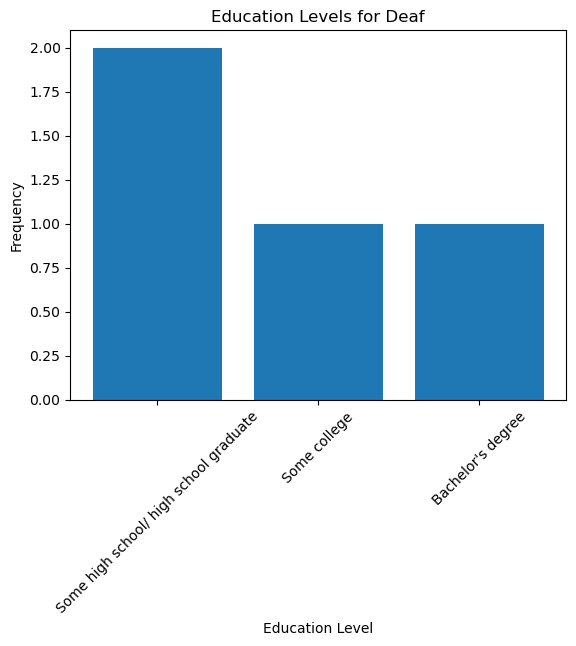

In [90]:
category = 'Deaf'
record_numbers = categories[category]
category_ASLSurveyInformation = ASLSurveyInformation[ASLSurveyInformation['Record ID'].isin(record_numbers)]
response_options = [
    "Some high school/ high school graduate",
    "Some college",
    "Bachelor's degree",
    "Graduate school (e.g. Masters or PhD)"
]
education_counts = category_ASLSurveyInformation['What is your level of education?'].value_counts().reindex(response_options)
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title(f'Education Levels for {category}')
plt.xticks(rotation=45)
plt.show()

<font size="5">ASLCT and survey response comparison</font>

Creating a dictionary telling us the ASLCT scores belonging to each file

In [197]:
participant_ASLCTscores = {}

for file, participant_id in participant_and_file.items():
    file_path = 'C:/Users/Jasmine Awad/Desktop/COMS Data Science/RawDataASLTB/CleanedData/' + file  # Update the path to the directory containing participant files
    task_data = pd.read_csv(file_path)
    score = task_data['ASLCT'].iloc[0]  # Replace 'MatchScore' with the actual column name containing the score
    
    participant_ASLCTscores[file] = score

Creating a dictionary with file names as the key and the values being the ASLCT score and participant ID from each file

In [198]:
participant_ASLCTscores 

{'C02_cleaned.csv': 19.0,
 'C05_cleaned.csv': nan,
 'C08_cleaned.csv': 27.0,
 'C09_cleaned.csv': 21.0,
 'C10_cleaned.csv': 16.0,
 'C11_cleaned.csv': 25.0,
 'C17_cleaned.csv': nan,
 'H02_cleaned.csv': 13.0,
 'H03_cleaned.csv': 8.0,
 'H05_cleaned.csv': 11.0,
 'H07_cleaned.csv': 8.0,
 'H08_cleaned.csv': 12.0,
 'H09_cleaned.csv': 10.0,
 'H12_cleaned.csv': 7.0,
 'H13_cleaned.csv': 14.0,
 'H14_cleaned.csv': 17.0,
 'H15_cleaned.csv': 12.0,
 'H18_cleaned.csv': 12.0,
 'T04_cleaned.csv': 22.0,
 'T05_cleaned.csv': 25.0,
 'T08_cleaned.csv': 23.0,
 'S04_cleaned.csv': 17.0,
 'S03_cleaned.csv': 17.0,
 'S07_cleaned.csv': 10.0,
 'S09_cleaned.csv': 14.0,
 'S05_cleaned.csv': 19.0,
 'S08_cleaned.csv': 15.0,
 'S06_cleaned.csv': 13.0,
 'S02_cleaned.csv': 15.0,
 'S11_cleaned.csv': 23.0,
 'D02_cleaned.csv': 22.0,
 'D03_cleaned.csv': 29.0,
 'D05_cleaned.csv': 19.0,
 'D06_cleaned.csv': 16.0}

In [199]:
updated_participant_ASLCTscores = {}

for file, participant_id in participant_and_file.items():
    if file in participant_ASLCTscores:
        score = participant_ASLCTscores[file]
        updated_participant_ASLCTscores[file] = {'score': score, 'participant_id': participant_id}


In [200]:
updated_participant_ASLCTscores

{'C02_cleaned.csv': {'score': 19.0, 'participant_id': 39},
 'C05_cleaned.csv': {'score': nan, 'participant_id': 27},
 'C08_cleaned.csv': {'score': 27.0, 'participant_id': 35},
 'C09_cleaned.csv': {'score': 21.0, 'participant_id': 38},
 'C10_cleaned.csv': {'score': 16.0, 'participant_id': 34},
 'C11_cleaned.csv': {'score': 25.0, 'participant_id': 41},
 'C17_cleaned.csv': {'score': nan, 'participant_id': 37},
 'H02_cleaned.csv': {'score': 13.0, 'participant_id': 29},
 'H03_cleaned.csv': {'score': 8.0, 'participant_id': 44},
 'H05_cleaned.csv': {'score': 11.0, 'participant_id': 45},
 'H07_cleaned.csv': {'score': 8.0, 'participant_id': 46},
 'H08_cleaned.csv': {'score': 12.0, 'participant_id': 48},
 'H09_cleaned.csv': {'score': 10.0, 'participant_id': 49},
 'H12_cleaned.csv': {'score': 7.0, 'participant_id': 55},
 'H13_cleaned.csv': {'score': 14.0, 'participant_id': 51},
 'H14_cleaned.csv': {'score': 17.0, 'participant_id': 53},
 'H15_cleaned.csv': {'score': 12.0, 'participant_id': 59},
 '

Create a scatterplot to see if self report aligns with scores in ASLCT

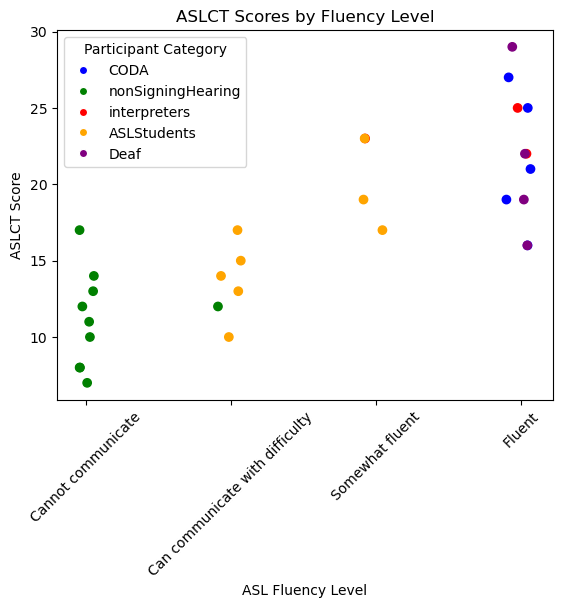

In [201]:
# Define the amount of jitter
jitter = 0.1

# Create a dictionary to store unique participant scores
participant_scores = {}

# Extract scores and participant IDs from the updated_participant_ASLCTscores dictionary
for file, data in updated_participant_ASLCTscores.items():
    if data['participant_id'] in grouped_participant_ids:
        participant_id = data['participant_id']
        score = data['score']
        if participant_id not in participant_scores:
            participant_scores[participant_id] = score

# Extract the unique participant IDs and their scores
participant_ids = list(participant_scores.keys())
scores = list(participant_scores.values())

# Create jittered x-axis values
jittered_fluency_indices = [fluency_level_mapping[fl] + np.random.uniform(-jitter, jitter) for fl in fluency_levels]

# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define the desired order of x-axis labels
x_axis_labels = ['Cannot communicate', 'Can communicate with difficulty', 'Somewhat fluent', 'Fluent']

# Create the scatterplot
plt.scatter(jittered_fluency_indices, scores, c=colors)
plt.xlabel('ASL Fluency Level')
plt.ylabel('ASLCT Score')
plt.title('ASLCT Scores by Fluency Level')

# Set the x-axis tick labels in the desired order
plt.xticks(range(len(x_axis_labels)), x_axis_labels, rotation=45)

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


<font size="5">ASLCT and fingerspelling task comparison</font>

In [202]:
participant_data = {}

for file, participant_id in participant_and_file.items():
    if file in updated_participant_ASLCTscores and file in updated_participant_FSscores and file in updated_participant_STscores and file in updated_participant_Mazescores and file in updated_participant_Matchscores:
        participant_data[participant_id] = {
            'aslct_score': updated_participant_ASLCTscores[file]['score'],
            'fingerspelling_score': updated_participant_FSscores[file]['score'],
            'match_score': updated_participant_Matchscores[file]['score'],
            'maze_score': updated_participant_Mazescores[file]['score'],
            'story_score': updated_participant_STscores[file]['score'],
            'participant_id': participant_id
        }
    else:
        # Handle missing scores for a participant
        participant_data[participant_id] = {
            'aslct_score': None,
            'fingerspelling_score': None,
            'match_score': None,
            'maze_score': None,
            'story_score': None,
            'participant_id': participant_id
        }


In [203]:
participant_data

{39: {'aslct_score': 19.0,
  'fingerspelling_score': 10.0,
  'match_score': 20.0,
  'maze_score': 4.0,
  'story_score': 6.0,
  'participant_id': 39},
 27: {'aslct_score': nan,
  'fingerspelling_score': 9.0,
  'match_score': 18.0,
  'maze_score': 6.0,
  'story_score': 0.0,
  'participant_id': 27},
 35: {'aslct_score': 27.0,
  'fingerspelling_score': 10.0,
  'match_score': 11.0,
  'maze_score': 6.0,
  'story_score': 1.0,
  'participant_id': 35},
 38: {'aslct_score': 21.0,
  'fingerspelling_score': 10.0,
  'match_score': 19.0,
  'maze_score': 6.0,
  'story_score': 1.0,
  'participant_id': 38},
 34: {'aslct_score': 16.0,
  'fingerspelling_score': 9.0,
  'match_score': 20.0,
  'maze_score': 3.0,
  'story_score': 1.0,
  'participant_id': 34},
 41: {'aslct_score': 25.0,
  'fingerspelling_score': 10.0,
  'match_score': 20.0,
  'maze_score': 6.0,
  'story_score': 0.0,
  'participant_id': 41},
 37: {'aslct_score': nan,
  'fingerspelling_score': 10.0,
  'match_score': 18.0,
  'maze_score': 4.0,
 

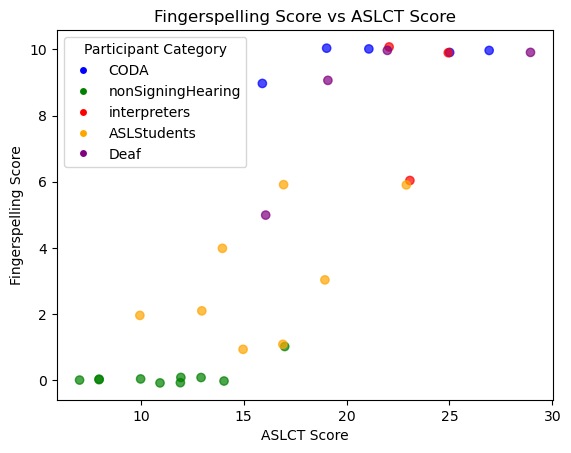

In [204]:
# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define categories as a list of tuples
categories = [
    ('CODA', [24, 39, 27, 35, 38, 34, 41, 37]),
    ('nonSigningHearing', [29, 44, 45, 46, 48, 49, 55, 51, 53, 54, 58]),
    ('interpreters', [25, 36, 70]),
    ('ASLStudents', [75, 77, 82, 88, 74, 85, 79, 68, 72]),
    ('Deaf', [91, 94, 103, 104])
]

# Create empty lists to store ASLCT scores, fingerspelling scores, and categories
aslct_scores = []
fingerspelling_scores = []
category_colors = []

# Extract ASLCT scores, fingerspelling scores, and categories from participant_data
for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    fingerspelling_score = data['fingerspelling_score']
    
    # Determine the category based on the participant's number
    category = None
    number = participant_id
    for cat, numbers in categories:
        if number in numbers:
            category = cat
            break
    
    # If a category is found, add the scores and category to the respective lists
    if category:
        aslct_scores.append(aslct_score)
        fingerspelling_scores.append(fingerspelling_score)
        category_colors.append(color_map.get(category, 'gray'))

# Add jitter to the x and y coordinates
jitter = 0.1
aslct_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in aslct_scores]
fingerspelling_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in fingerspelling_scores]

# Create the scatterplot with jitter
plt.scatter(aslct_scores_jittered, fingerspelling_scores_jittered, c=category_colors, alpha=0.7)
plt.xlabel('ASLCT Score')
plt.ylabel('Fingerspelling Score')
plt.title('Fingerspelling Score vs ASLCT Score')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


In [205]:
# Extract ASLCT scores and fingerspelling scores from participant_data
aslct_scores = []
fingerspelling_scores = []

for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    fingerspelling_score = data['fingerspelling_score']

    # Skip if either score is NaN or inf
    if np.isnan(aslct_score) or np.isnan(fingerspelling_score) or np.isinf(aslct_score) or np.isinf(fingerspelling_score):
        continue

    aslct_scores.append(aslct_score)
    fingerspelling_scores.append(fingerspelling_score)

# Convert the scores to numpy arrays
aslct_scores = np.array(aslct_scores)
fingerspelling_scores = np.array(fingerspelling_scores)

# Perform the correlation analysis
correlation, p_value = pearsonr(aslct_scores, fingerspelling_scores)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Correlation coefficient: 0.8411788000572336
p-value: 1.657639543761082e-09


<font size="5">ASLCT and match task comparison</font>

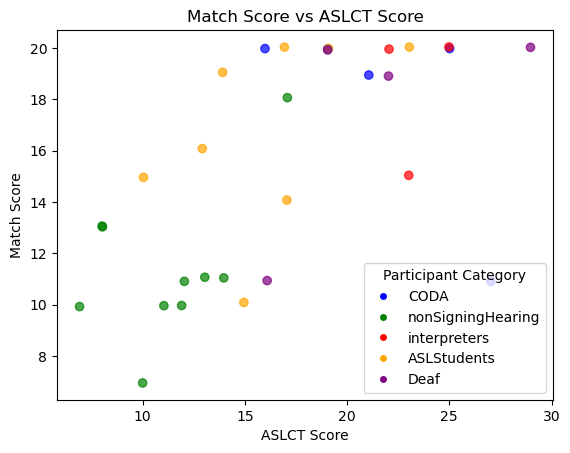

In [206]:
# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define categories as a list of tuples
categories = [
    ('CODA', [24, 39, 27, 35, 38, 34, 41, 37]),
    ('nonSigningHearing', [29, 44, 45, 46, 48, 49, 55, 51, 53, 54, 58]),
    ('interpreters', [25, 36, 70]),
    ('ASLStudents', [75, 77, 82, 88, 74, 85, 79, 68, 72]),
    ('Deaf', [91, 94, 103, 104])
]

# Create empty lists to store ASLCT scores, match scores, and categories
aslct_scores = []
match_scores = []
category_colors = []

# Extract ASLCT scores, match scores, and categories from participant_data
for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    match_score = data['match_score']
    
    # Determine the category based on the participant's number
    category = None
    number = participant_id
    for cat, numbers in categories:
        if number in numbers:
            category = cat
            break
    
    # If a category is found, add the scores and category to the respective lists
    if category:
        aslct_scores.append(aslct_score)
        match_scores.append(match_score)
        category_colors.append(color_map.get(category, 'gray'))

# Add jitter to the x and y coordinates
jitter = 0.1
aslct_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in aslct_scores]
match_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in match_scores]

# Create the scatterplot with jitter
plt.scatter(aslct_scores_jittered, match_scores_jittered, c=category_colors, alpha=0.7)
plt.xlabel('ASLCT Score')
plt.ylabel('Match Score')
plt.title('Match Score vs ASLCT Score')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


In [207]:
# Extract ASLCT scores and match scores from participant_data
aslct_scores = []
match_scores = []

for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    match_score = data['match_score']

    # Skip if either score is NaN or inf
    if np.isnan(aslct_score) or np.isnan(match_score) or np.isinf(aslct_score) or np.isinf(match_score):
        continue

    aslct_scores.append(aslct_score)
    match_scores.append(match_score)

# Convert the scores to numpy arrays
aslct_scores = np.array(aslct_scores)
match_scores = np.array(match_scores)

# Perform the correlation analysis
correlation, p_value = pearsonr(aslct_scores, match_scores)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Correlation coefficient: 0.6150893041606832
p-value: 0.00017950331597653513


<font size="5">ASLCT and maze task comparison</font>

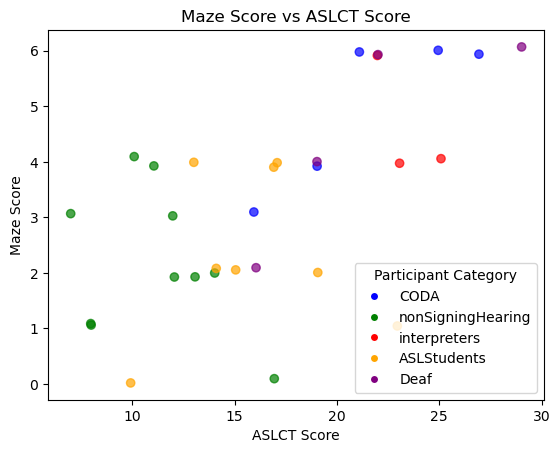

In [208]:
# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define categories as a list of tuples
categories = [
    ('CODA', [24, 39, 27, 35, 38, 34, 41, 37]),
    ('nonSigningHearing', [29, 44, 45, 46, 48, 49, 55, 51, 53, 54, 58]),
    ('interpreters', [25, 36, 70]),
    ('ASLStudents', [75, 77, 82, 88, 74, 85, 79, 68, 72]),
    ('Deaf', [91, 94, 103, 104])
]

# Create empty lists to store ASLCT scores, maze scores, and categories
aslct_scores = []
maze_scores = []
category_colors = []

# Extract ASLCT scores, maze scores, and categories from participant_data
for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    maze_score = data['maze_score']
    
    # Determine the category based on the participant's number
    category = None
    number = participant_id
    for cat, numbers in categories:
        if number in numbers:
            category = cat
            break
    
    # If a category is found, add the scores and category to the respective lists
    if category:
        aslct_scores.append(aslct_score)
        maze_scores.append(maze_score)
        category_colors.append(color_map.get(category, 'gray'))

# Add jitter to the x and y coordinates
jitter = 0.1
aslct_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in aslct_scores]
maze_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in maze_scores]

# Create the scatterplot with jitter
plt.scatter(aslct_scores_jittered, maze_scores_jittered, c=category_colors, alpha=0.7)
plt.xlabel('ASLCT Score')
plt.ylabel('Maze Score')
plt.title('Maze Score vs ASLCT Score')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


In [211]:
# Extract ASLCT scores and maze scores from participant_data
aslct_scores = []
maze_scores = []

for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    maze_score = data['maze_score']

    # Skip if either score is NaN or inf
    if np.isnan(aslct_score) or np.isnan(maze_score) or np.isinf(aslct_score) or np.isinf(maze_score):
        continue

    aslct_scores.append(aslct_score)
    maze_scores.append(maze_score)

# Convert the scores to numpy arrays
aslct_scores = np.array(aslct_scores)
maze_scores = np.array(maze_scores)

# Perform the correlation analysis
correlation, p_value = pearsonr(aslct_scores, maze_scores)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Correlation coefficient: 0.6267194264053151
p-value: 0.00012413537474077773


<font size="5">ASLCT and story task comparison</font>

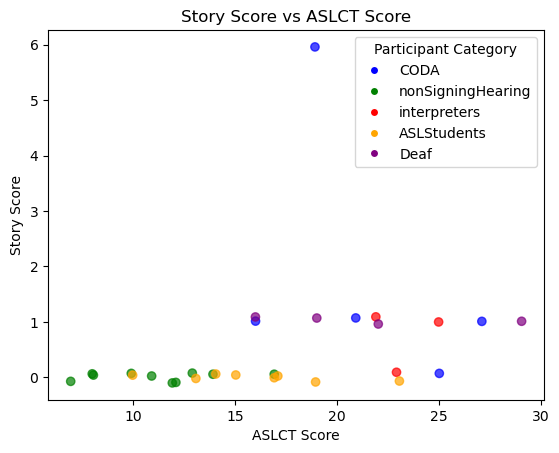

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define categories as a list of tuples
categories = [
    ('CODA', [24, 39, 27, 35, 38, 34, 41, 37]),
    ('nonSigningHearing', [29, 44, 45, 46, 48, 49, 55, 51, 53, 54, 58]),
    ('interpreters', [25, 36, 70]),
    ('ASLStudents', [75, 77, 82, 88, 74, 85, 79, 68, 72]),
    ('Deaf', [91, 94, 103, 104])
]

# Create empty lists to store ASLCT scores, story scores, and categories
aslct_scores = []
story_scores = []
category_colors = []

# Extract ASLCT scores, story scores, and categories from participant_data
for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    story_score = data['story_score']
    
    # Determine the category based on the participant's number
    category = None
    number = participant_id
    for cat, numbers in categories:
        if number in numbers:
            category = cat
            break
    
    # If a category is found, add the scores and category to the respective lists
    if category:
        aslct_scores.append(aslct_score)
        story_scores.append(story_score)
        category_colors.append(color_map.get(category, 'gray'))

# Add jitter to the x and y coordinates
jitter = 0.1
aslct_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in aslct_scores]
story_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in story_scores]

# Create the scatterplot with jitter
plt.scatter(aslct_scores_jittered, story_scores_jittered, c=category_colors, alpha=0.7)
plt.xlabel('ASLCT Score')
plt.ylabel('Story Score')
plt.title('Story Score vs ASLCT Score')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


In [187]:
# Extract ASLCT scores and story scores from participant_data
aslct_scores = []
story_scores = []

for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    story_score = data['story_score']

    # Skip if either score is NaN or inf
    if np.isnan(aslct_score) or np.isnan(story_score) or np.isinf(aslct_score) or np.isinf(story_score):
        continue

    aslct_scores.append(aslct_score)
    story_scores.append(story_score)

# Convert the scores to numpy arrays
aslct_scores = np.array(aslct_scores)
story_scores = np.array(story_scores)

# Perform the correlation analysis
correlation, p_value = pearsonr(aslct_scores, story_scores)

# Calculate the degrees of freedom
n = len(aslct_scores)
degrees_of_freedom = n - 2

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)
print("Degrees of freedom:", degrees_of_freedom)



Correlation coefficient: 0.31132384167639016
p-value: 0.08283916939918129
Degrees of freedom: 30


<font size="5">ASLCT and All tasks added comparison</font>

In [161]:
# Iterate over the participant_data dictionary
for participant_id, data in participant_data.items():
    # Extract individual task scores
    fingerspelling_score = data['fingerspelling_score']
    match_score = data['match_score']
    maze_score = data['maze_score']
    story_score = data['story_score']
    
    # Compute the sum of task scores
    total_score = fingerspelling_score + match_score + maze_score + story_score
    
    # Add the total score to the participant's data dictionary
    data['total_score'] = total_score


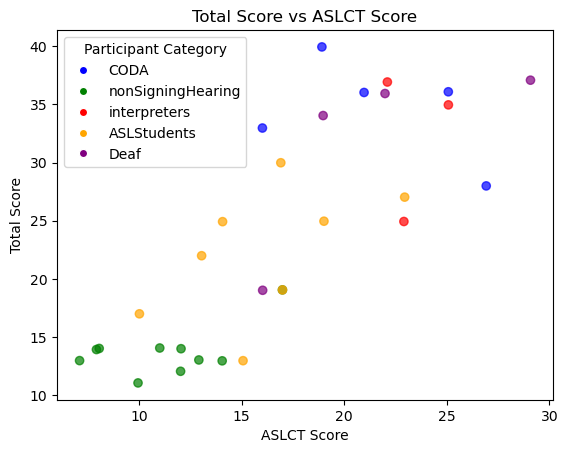

In [175]:
# Define color map for categories
color_map = {
    'CODA': 'blue',
    'nonSigningHearing': 'green',
    'interpreters': 'red',
    'ASLStudents': 'orange',
    'Deaf': 'purple'
}

# Define categories as a list of tuples
categories = [
    ('CODA', [24, 39, 27, 35, 38, 34, 41, 37]),
    ('nonSigningHearing', [29, 44, 45, 46, 48, 49, 55, 51, 53, 54, 58]),
    ('interpreters', [25, 36, 70]),
    ('ASLStudents', [75, 77, 82, 88, 74, 85, 79, 68, 72]),
    ('Deaf', [91, 94, 103, 104])
]

# Create empty lists to store ASLCT scores, total scores, and categories
aslct_scores = []
total_scores = []
category_colors = []

# Extract ASLCT scores, total scores, and categories from participant_data
for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    total_score = data['total_score']
    
    # Determine the category based on the participant's number
    category = None
    number = participant_id
    for cat, numbers in categories:
        if number in numbers:
            category = cat
            break
    
    # If a category is found, add the scores and category to the respective lists
    if category:
        aslct_scores.append(aslct_score)
        total_scores.append(total_score)
        category_colors.append(color_map.get(category, 'gray'))

# Add jitter to the x and y coordinates
jitter = 0.1
aslct_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in aslct_scores]
total_scores_jittered = [val + np.random.uniform(-jitter, jitter) for val in total_scores]

# Create the scatterplot with jitter
plt.scatter(aslct_scores_jittered, total_scores_jittered, c=category_colors, alpha=0.7)
plt.xlabel('ASLCT Score')
plt.ylabel('Total Score')
plt.title('Total Score vs ASLCT Score')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color) for category, color in color_map.items()]
plt.legend(handles=legend_elements, title='Participant Category', loc='best')

plt.show()


In [176]:
# Extract ASLCT scores and total scores from participant_data
aslct_scores = []
total_scores = []

for participant_id, data in participant_data.items():
    aslct_score = data['aslct_score']
    total_score = data['total_score']

    # Skip if either score is NaN or inf
    if np.isnan(aslct_score) or np.isnan(total_score) or np.isinf(aslct_score) or np.isinf(total_score):
        continue

    aslct_scores.append(aslct_score)
    total_scores.append(total_score)

# Convert the scores to numpy arrays
aslct_scores = np.array(aslct_scores)
total_scores = np.array(total_scores)

# Perform the correlation analysis
correlation, p_value = pearsonr(aslct_scores, total_scores)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Correlation coefficient: 0.7930842451295217
p-value: 6.218249224065346e-08
